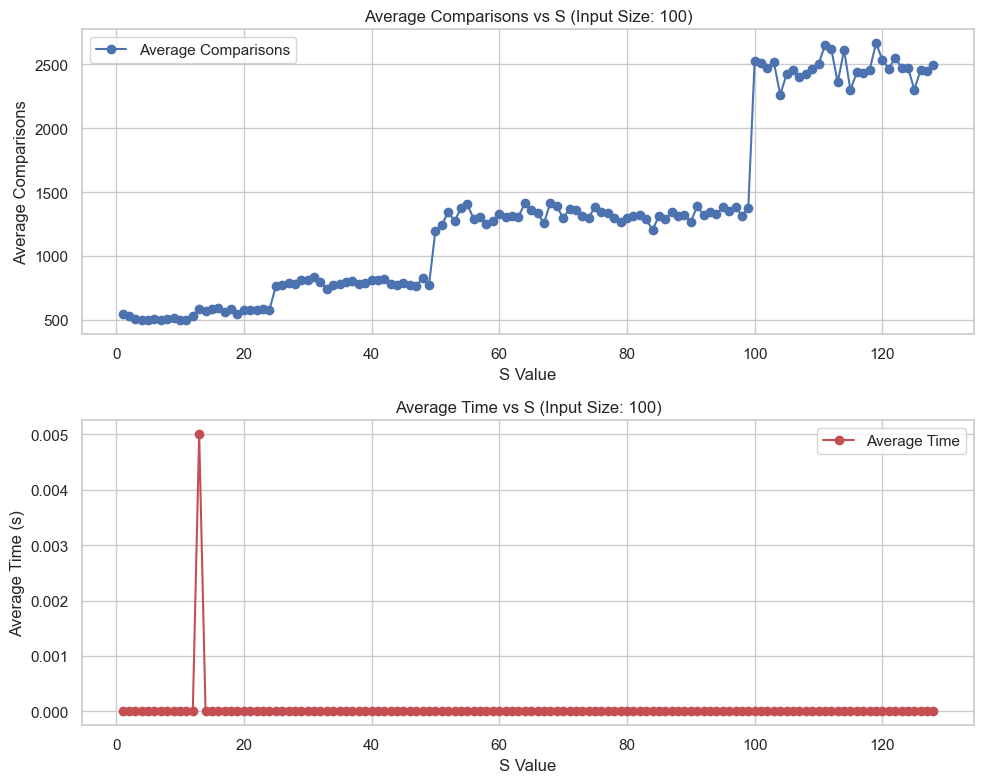

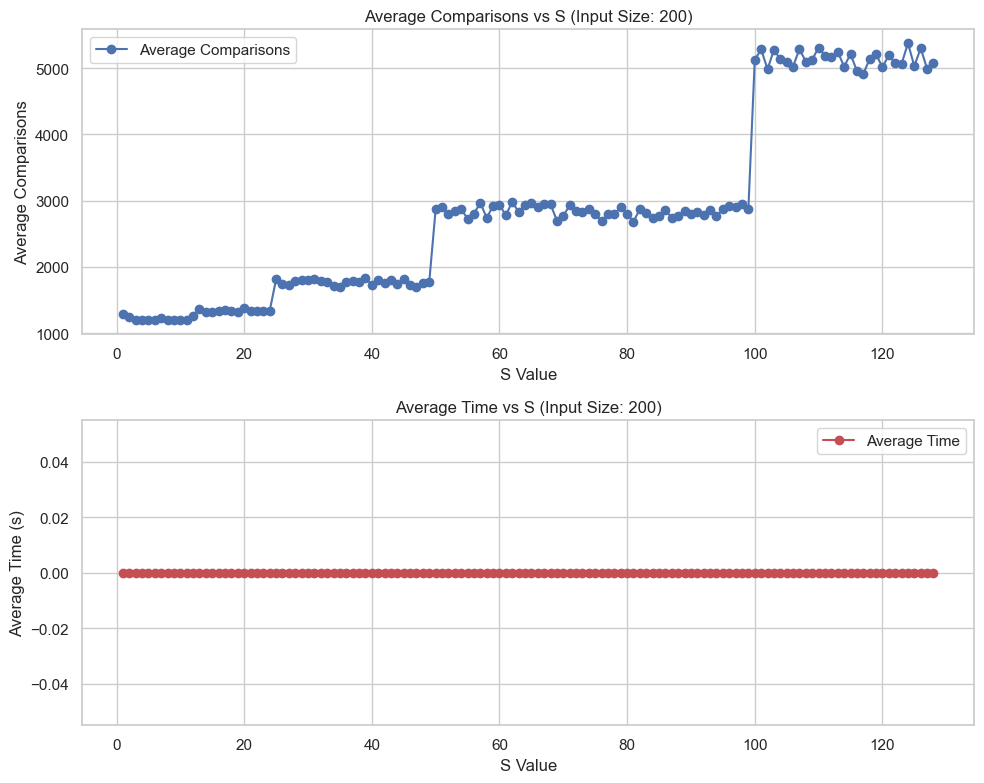

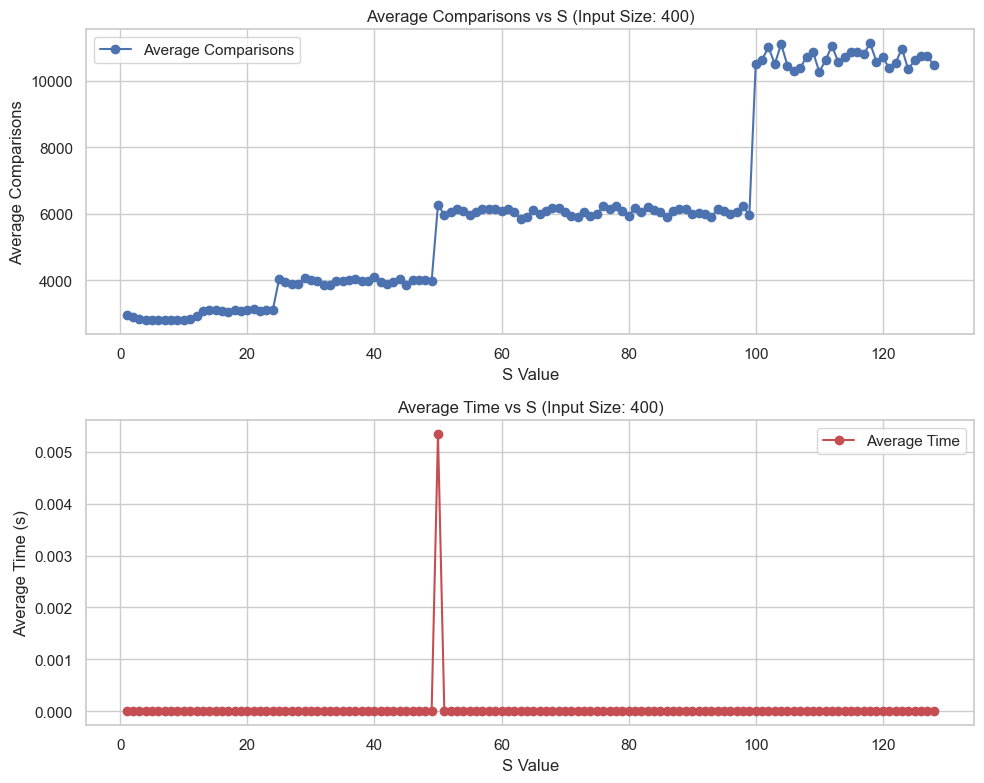

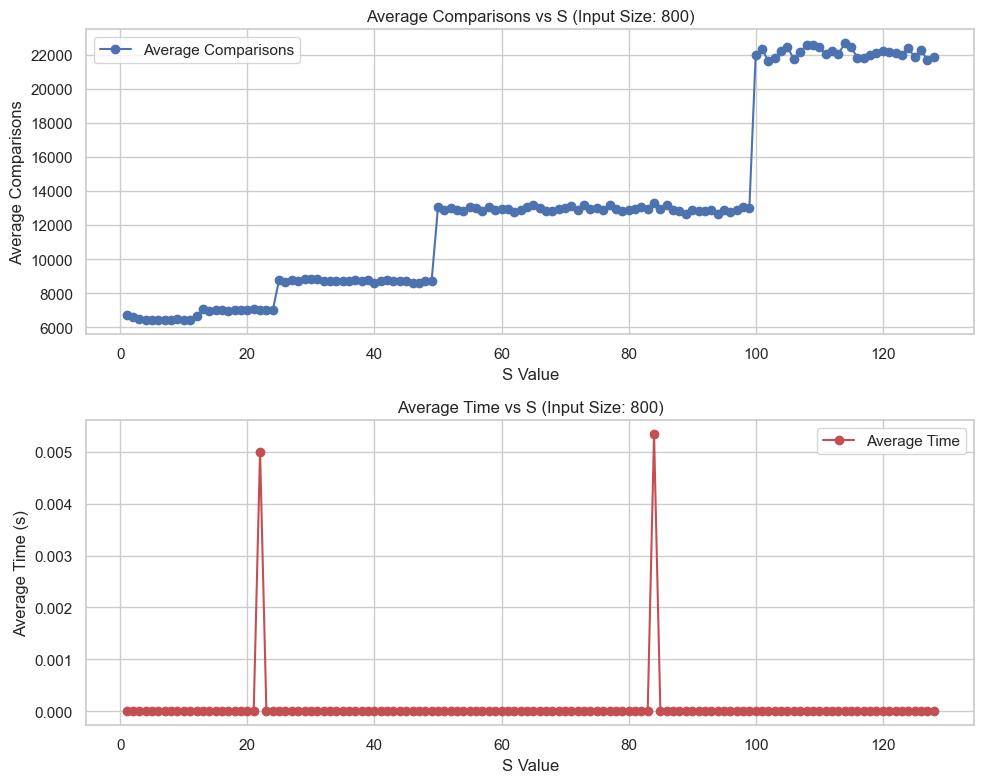

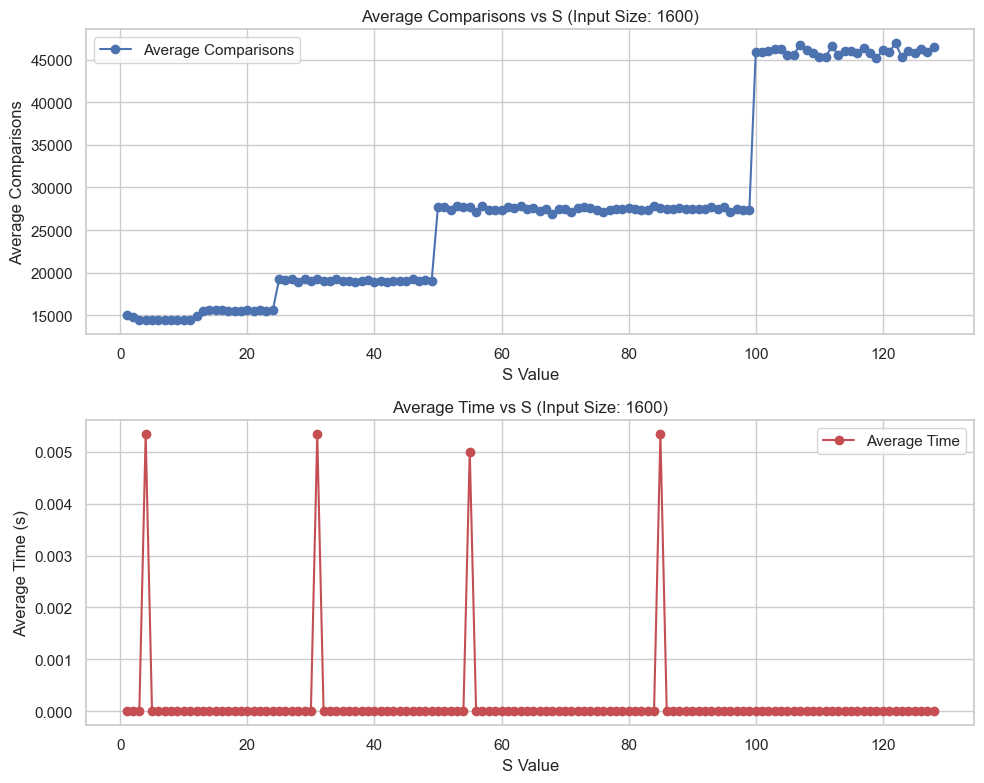

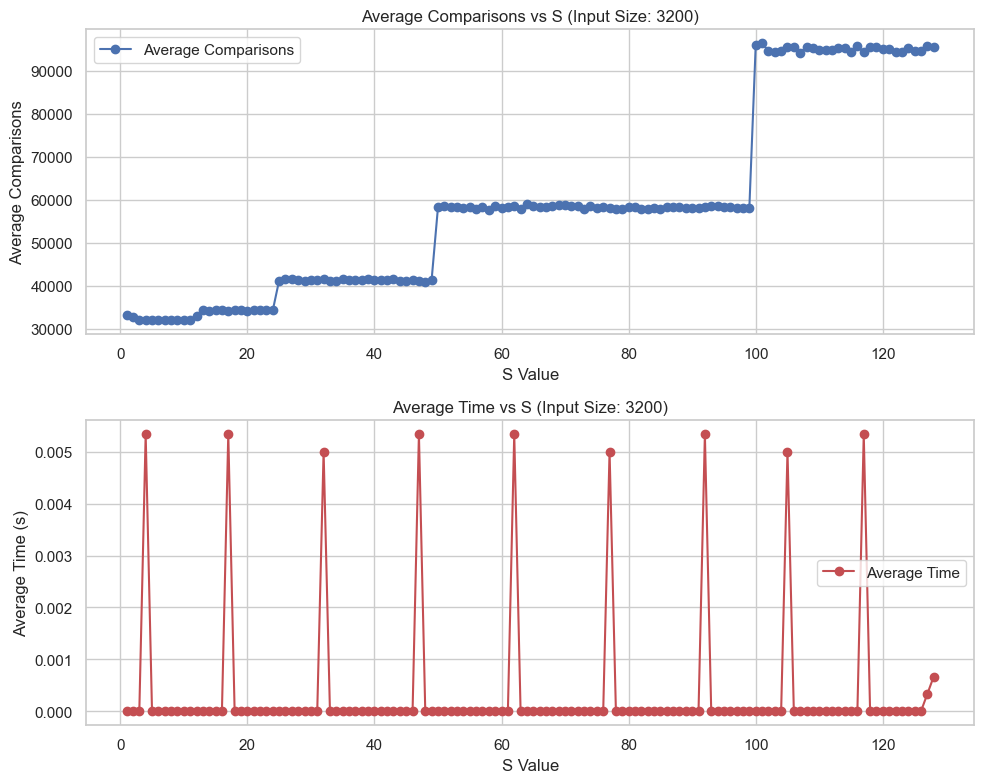

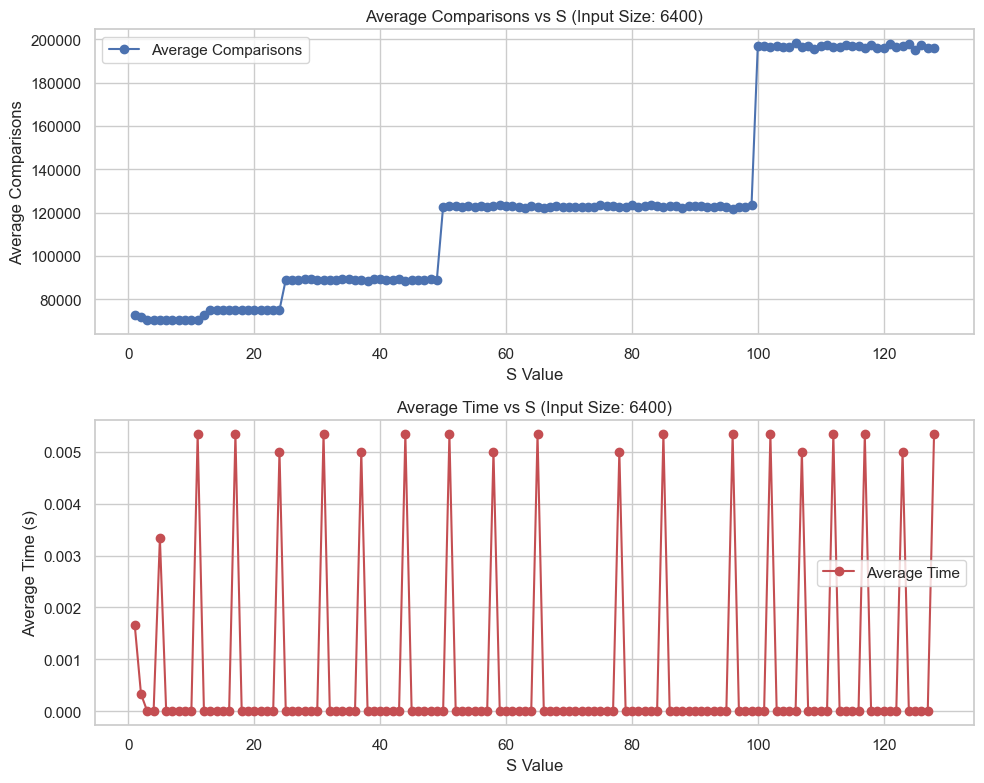

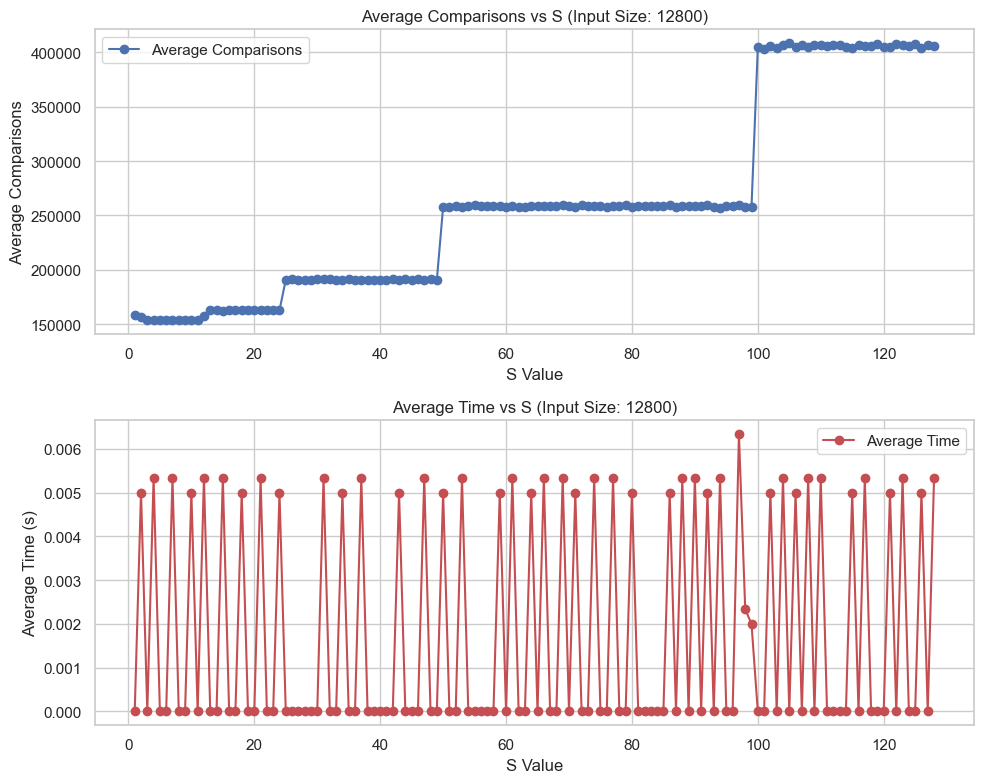

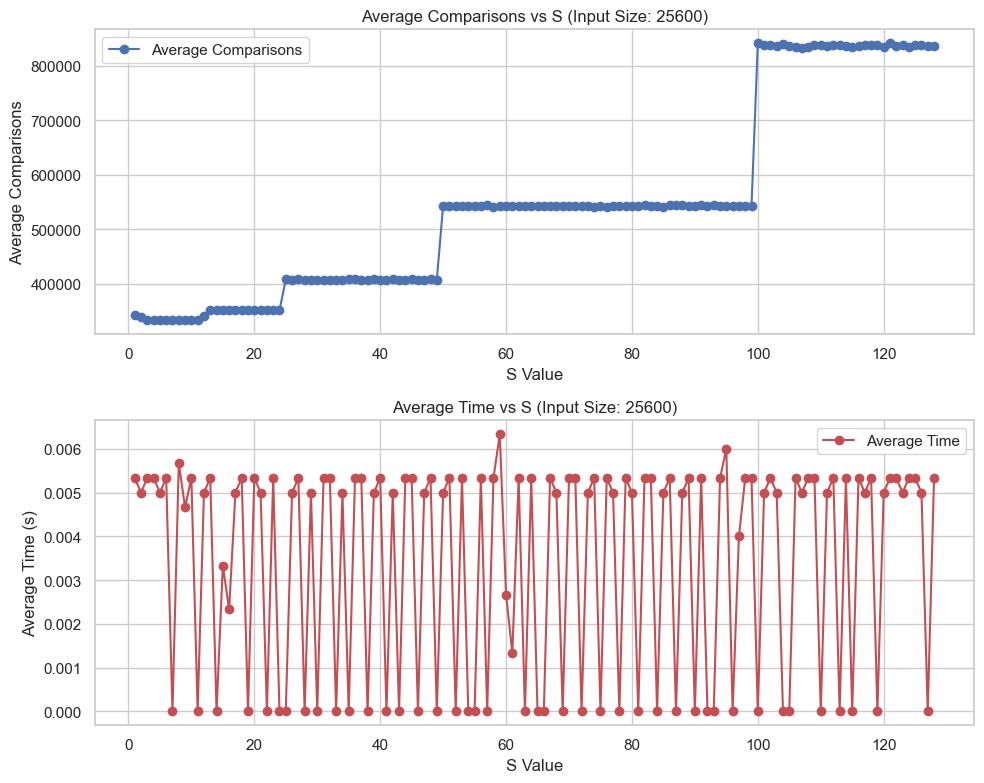

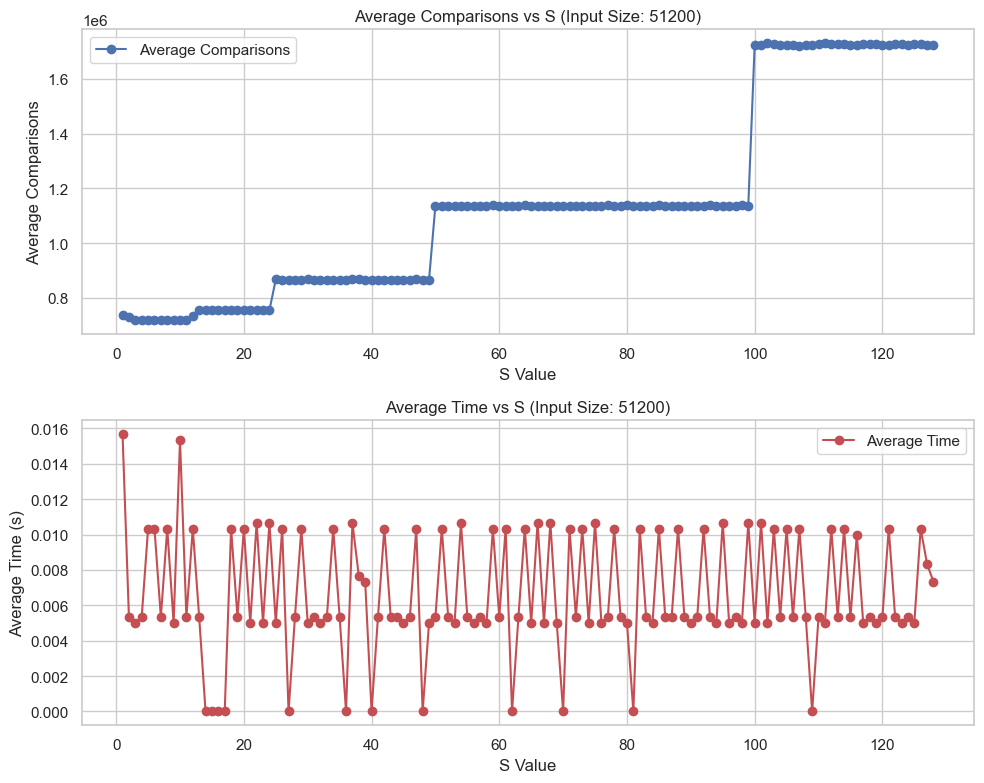

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("optimal_S_results.csv")

# List of unique input sizes
input_sizes = data['InputSize'].unique()

# Set up the plot style
sns.set(style="whitegrid")

# Create separate plots for each input size
for size in input_sizes:
    subset = data[data['InputSize'] == size]
    
    # Create a figure with two subplots
    fig, ax1 = plt.subplots(2, 1, figsize=(10, 8))
    
    # Plot average comparisons
    ax1[0].plot(subset['S'], subset['AverageComparisons'], marker='o', color='b', label='Average Comparisons')
    ax1[0].set_title(f'Average Comparisons vs S (Input Size: {size})')
    ax1[0].set_xlabel('S Value')
    ax1[0].set_ylabel('Average Comparisons')
    ax1[0].grid(True)
    ax1[0].legend()

    # Plot average time
    ax1[1].plot(subset['S'], subset['AverageTime'], marker='o', color='r', label='Average Time')
    ax1[1].set_title(f'Average Time vs S (Input Size: {size})')
    ax1[1].set_xlabel('S Value')
    ax1[1].set_ylabel('Average Time (s)')
    ax1[1].grid(True)
    ax1[1].legend()

    # Show plots
    plt.tight_layout()
    plt.show()


In [4]:
import pandas as pd

# Load the CSV file
file_path = 'optimal_S_results.csv'
data = pd.read_csv(file_path)

# Normalize the time taken and key comparison values
data['time_normalized'] = (data['AverageTime'] - data['AverageTime'].min()) / (data['AverageTime'].max() - data['AverageTime'].min())
data['comparisons_normalized'] = (data['AverageComparisons'] - data['AverageComparisons'].min()) / (data['AverageComparisons'].max() - data['AverageComparisons'].min())

# Sum the normalized values to find the combined score
data['combined_score'] = data['time_normalized'] + data['comparisons_normalized']

# Find the optimal S value for each input size based on the minimum combined score
optimal_s_per_input = data.loc[data.groupby('InputSize')['combined_score'].idxmin()]

# Select relevant columns for the table
optimal_s_table = optimal_s_per_input[['InputSize', 'S', 'AverageComparisons', 'AverageTime', 'combined_score']]

# Display the table using pandas Styler for better formatting
styled_table = optimal_s_table.style.set_table_attributes('style="width: 80%; margin: auto;"') \
                                     .set_caption("Optimal S Values Summary Table") \
                                     .set_table_styles([{'selector': 'caption', 'props': [('font-size', '18px'), ('font-weight', 'bold'), ('text-align', 'center')]}]) \
                                     .highlight_max(subset=['AverageComparisons', 'AverageTime', 'combined_score'], color='lightgreen') \
                                     .highlight_min(subset=['AverageComparisons', 'AverageTime', 'combined_score'], color='lightcoral')

# Display the styled table
styled_table



,InputSize,S,AverageComparisons,AverageTime,combined_score
6,100,7,496,0.000000,0.000000
135,200,8,1194,0.000000,0.000403
262,400,7,2790,0.000000,0.001326
389,800,6,6389,0.000000,0.003406
521,1600,10,14398,0.000000,0.008036
645,3200,6,31988,0.000000,0.018203
773,6400,6,70291,0.000000,0.040344
901,12800,6,153544,0.000000,0.088467
1034,25600,11,333498,0.000000,0.192487
1165,51200,14,753713,0.000000,0.435386


In [6]:
import pandas as pd

# Load the CSV file
file_path = 'optimal_S_results.csv'
data = pd.read_csv(file_path)

# Normalize the average time and comparisons
data['time_normalized'] = (data['AverageTime'] - data['AverageTime'].min()) / (data['AverageTime'].max() - data['AverageTime'].min())
data['comparisons_normalized'] = (data['AverageComparisons'] - data['AverageComparisons'].min()) / (data['AverageComparisons'].max() - data['AverageComparisons'].min())

# Sum the normalized values to find the combined score
data['combined_score'] = data['time_normalized'] + data['comparisons_normalized']

# Find the overall optimal S value based on minimum combined score
overall_optimal_s = data.loc[data['combined_score'].idxmin()]

# Select relevant information for display
optimal_s_info = overall_optimal_s[['S', 'AverageComparisons', 'AverageTime', 'combined_score']]

# Display the optimal S value and its information
print("Optimal S Value for Switching from Insertion Sort to Merge Sort:")
print(optimal_s_info)


Optimal S Value for Switching from Insertion Sort to Merge Sort:
S                       7.0
AverageComparisons    496.0
AverageTime             0.0
combined_score          0.0
Name: 6, dtype: float64
